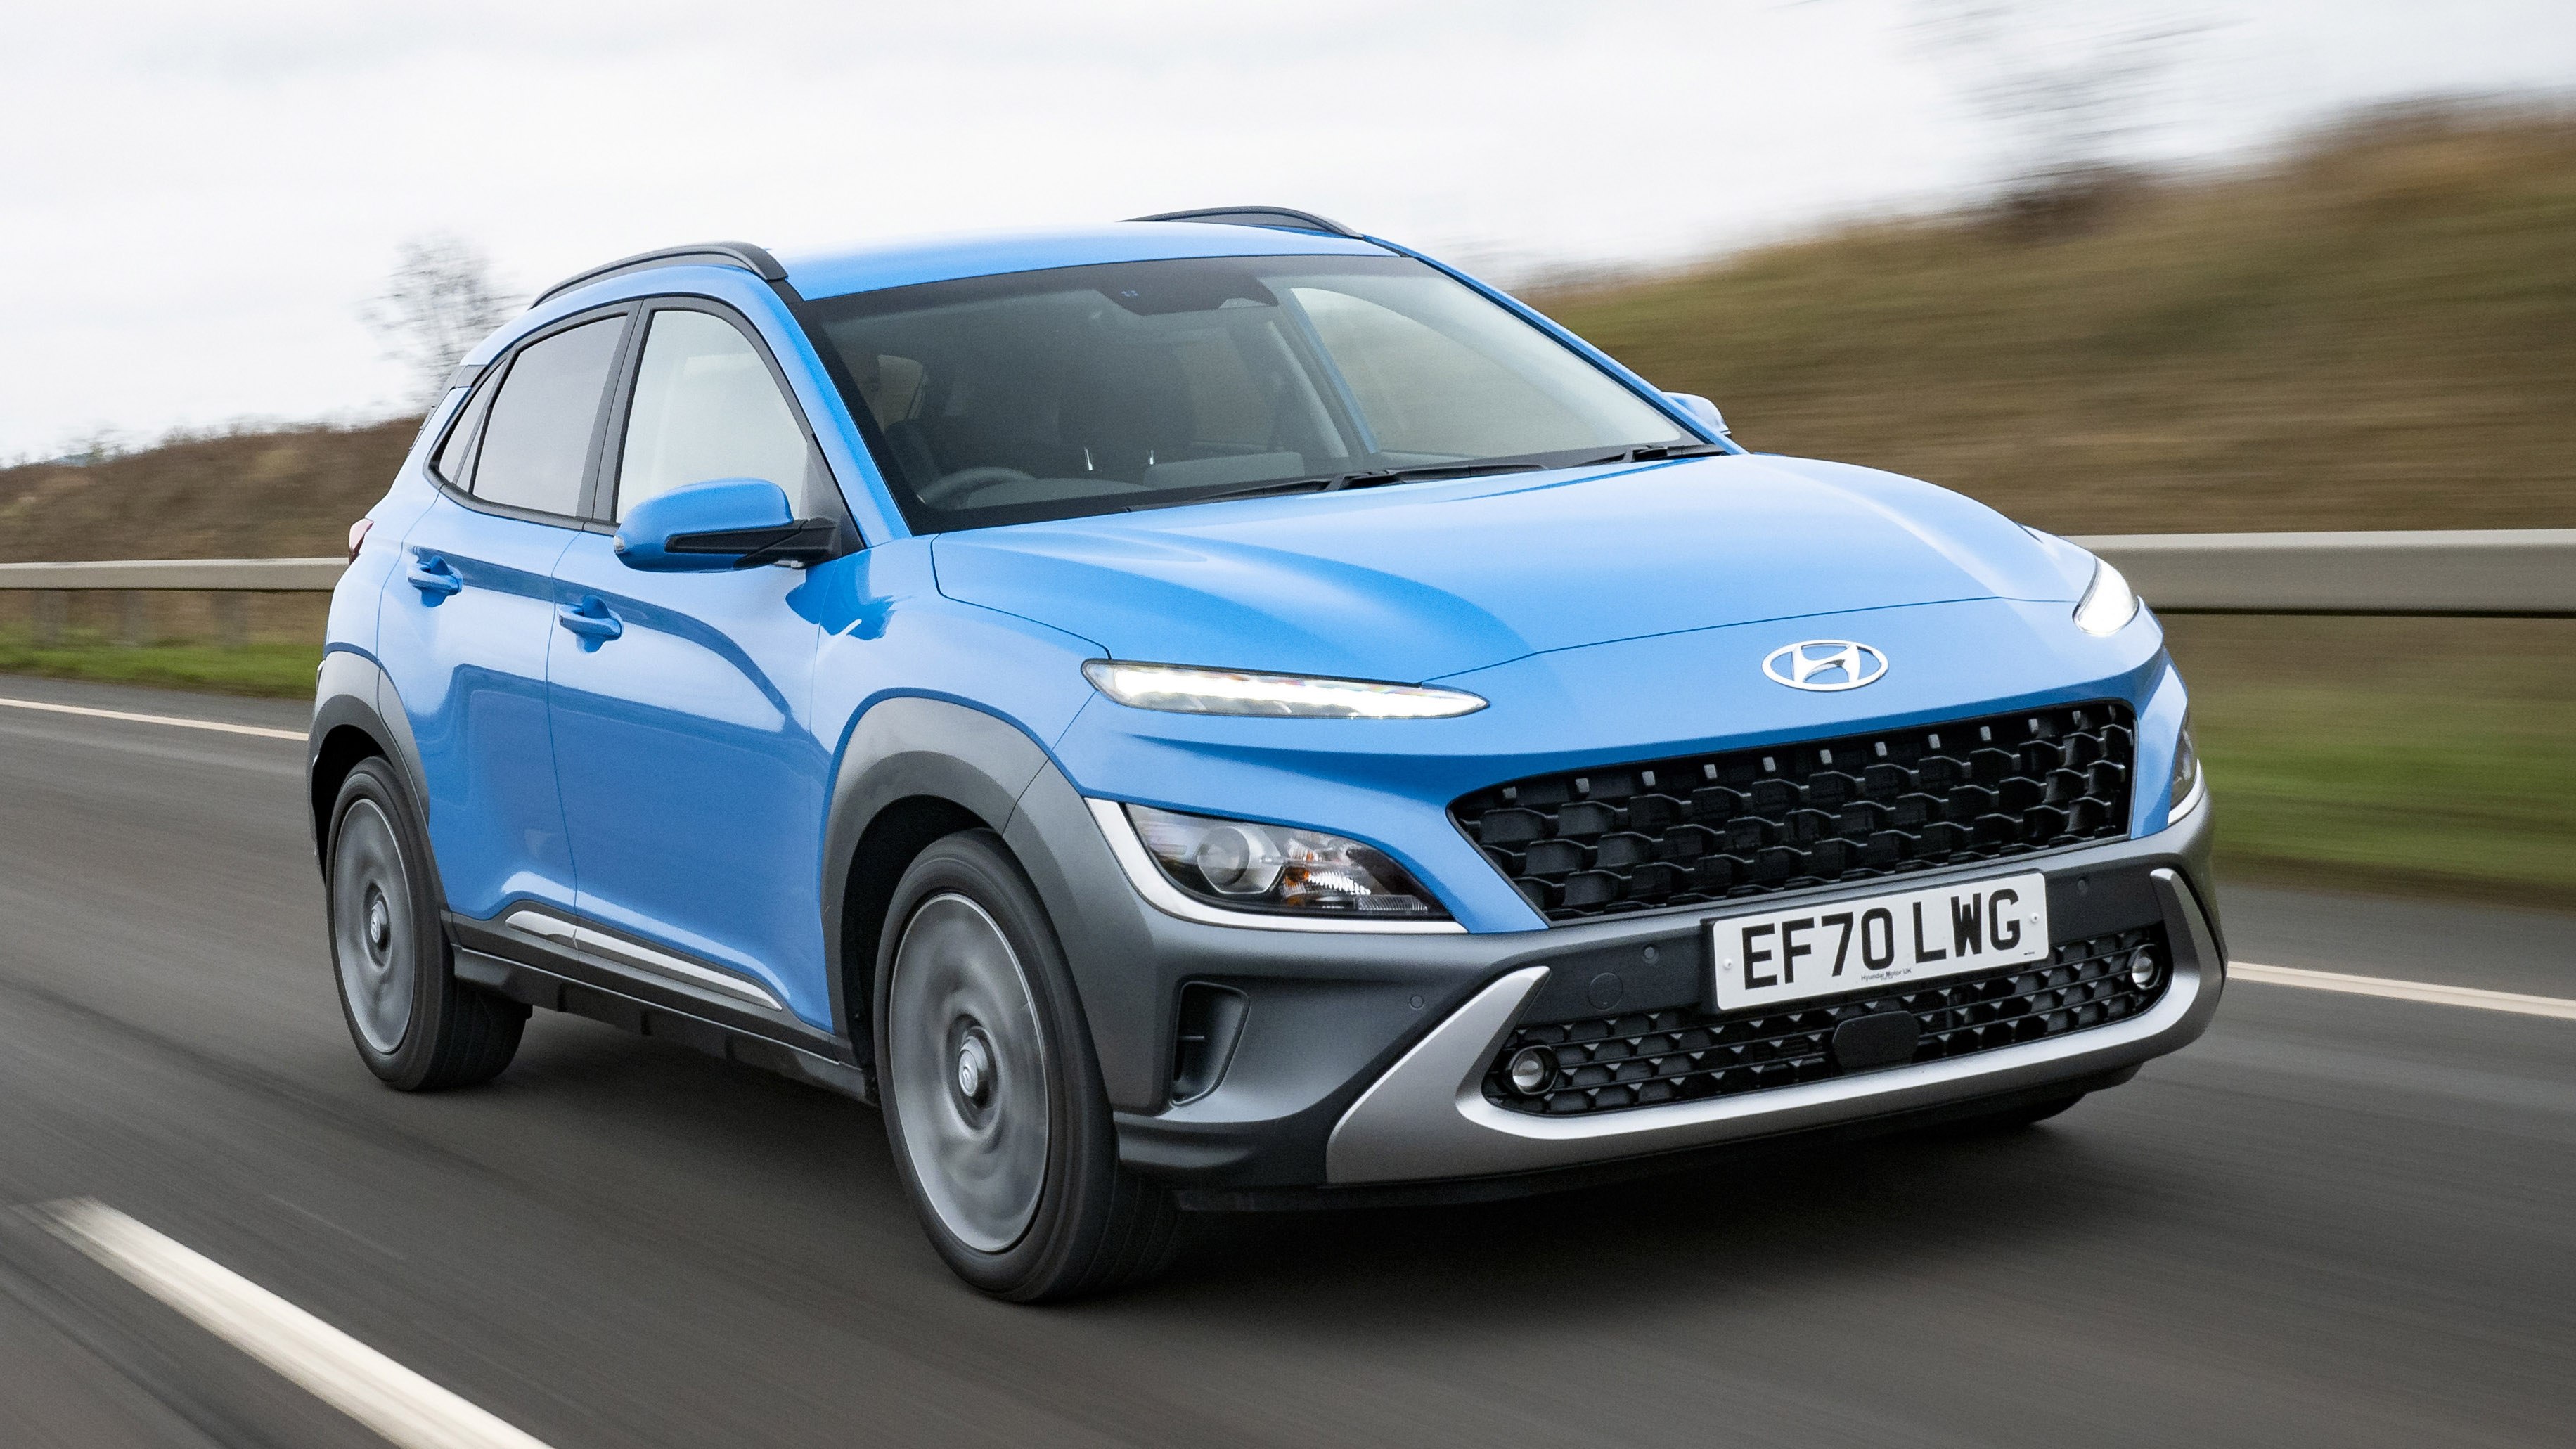

# Used Hyundai car price Regression


---



---



In [ ]:
# importing library
import numpy as np
import pandas as pd

In [ ]:
# 1) Import Data

In [ ]:
data="/content/drive/MyDrive/ML assignment/hyundi.csv"
df=pd.read_csv(data)

In [ ]:
# Reading data set

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


# ABOUT DATASET


---



---




1. model : Name of the car which includes Brand name and Model name
2. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric)
3. Transmission : The type of transmission used by the car. (Automatic / Manual)
4. Mileage : The standard mileage offered by the car company in kmpl or km/kg
5. Enginesize : the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc).
6. Price : The price of the used car 
7. tax(£) : money that you pay to the government so that you can drive your car on the roads.
8. mpg :  means miles per gallon, which is essentially how much fuel you burn in comparison to the distance you cover.
9. year : model year

In [ ]:
# Check dataset size

In [ ]:
df.shape

(4860, 9)

In [ ]:
# Find and treat missing values (If any)

In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

In [ ]:
# checking unique values of columns

In [ ]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print()

model
[' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona'
 ' Veloster' ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan' ' Getz'
 ' Amica']

year
[2017 2016 2015 2018 2019 2013 2014 2011 2012 2020 2010 2008 2009 2000
 2005 2007 2003 2002 2006]

price
[ 7999 14499 11399 ...  8680  6830 13994]

transmission
['Manual' 'Automatic' 'Semi-Auto' 'Other']

mileage
[17307 25233 37877 ... 13810 23313 11472]

fuelType
['Petrol' 'Diesel' 'Hybrid' 'Other']

tax(£)
[145 235  30  20 160 125 150 135 200   0 165 265 300 205 140 325 260 240
 330 305 120 190 555 115]

mpg
[ 58.9  43.5  61.7  60.1  51.4  55.4  57.6  56.5  34.9  65.7  44.8  53.3
  78.4  78.5  46.3  45.6  72.4  44.1  52.3  35.3  41.5  61.4  31.7  38.7
  48.7  33.6  64.2  57.7  50.4  47.9  62.8  39.2  47.1  42.8  74.3  28.
  67.3  34.   36.2  42.2   1.1  54.3  46.   39.8  43.6  76.3  68.9  49.6
  35.8  37.7 256.8  37.2  40.9  40.4  70.6  34.5  38.2  32.8  30.4  28.8]

engineSize
[1.2 2.  1.7 1.  1.4 1.6 0.  2.5 2.2 1.3 2.9 1.1 2.

In [ ]:
# droping duplicate values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(4774, 9)

In [ ]:
# Check column types and describe which columns are numerical or categorical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4774 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4774 non-null   object 
 1   year          4774 non-null   int64  
 2   price         4774 non-null   int64  
 3   transmission  4774 non-null   object 
 4   mileage       4774 non-null   int64  
 5   fuelType      4774 non-null   object 
 6   tax(£)        4774 non-null   int64  
 7   mpg           4774 non-null   float64
 8   engineSize    4774 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 373.0+ KB


In [ ]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object

In [ ]:
# Perform Univariate analysis

In [ ]:
# 1) Calculate mean, median, std dev, and quartiles of numerical data

In [ ]:
df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000
mean,2017.092166,12727.809384,21658.914537,121.187683,53.837956,1.460285
std,1.921323,5976.925227,17618.489657,58.135472,12.740499,0.401858
min,2000.000000,1200.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.000000,8542.500000,125.000000,44.800000,1.200000
50%,2017.000000,11992.500000,17627.000000,145.000000,55.400000,1.600000
75%,2018.000000,15695.000000,31067.500000,145.000000,60.100000,1.700000
max,2020.000000,92000.000000,138000.000000,555.000000,256.800000,2.900000


In [ ]:
# 2) Plot histogram for a few categorical variables

In [ ]:
integer=[]
string=[]
for i in df.columns:
    if df[i].dtypes=="object":
        string.append(i)
    else:
        integer.append(i)


In [ ]:
string

['model', 'transmission', 'fuelType']

In [ ]:
integer

['year', 'price', 'mileage', 'tax(£)', 'mpg', 'engineSize']

# DATA VISUALIATION


---



---



In [ ]:
# importing visualisation library
import seaborn as sns 
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

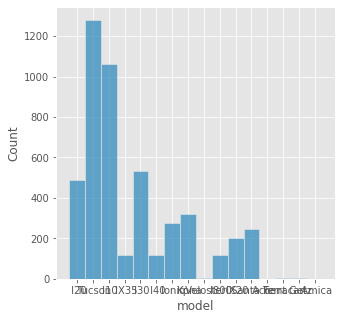

<Figure size 432x288 with 0 Axes>

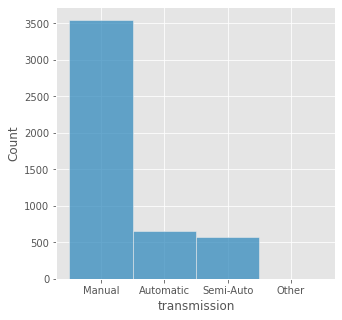

<Figure size 432x288 with 0 Axes>

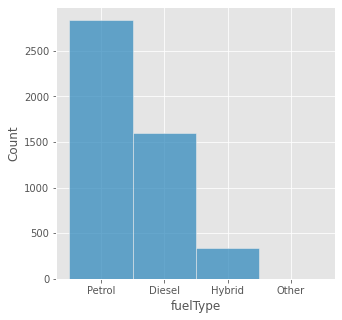

In [ ]:
for i in string:
    plt.figure()
    plt.figure(figsize=(5,5))
    sns.histplot(df[i])

In [ ]:
# 3 Check the distribution of numerical variables and comment on it

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


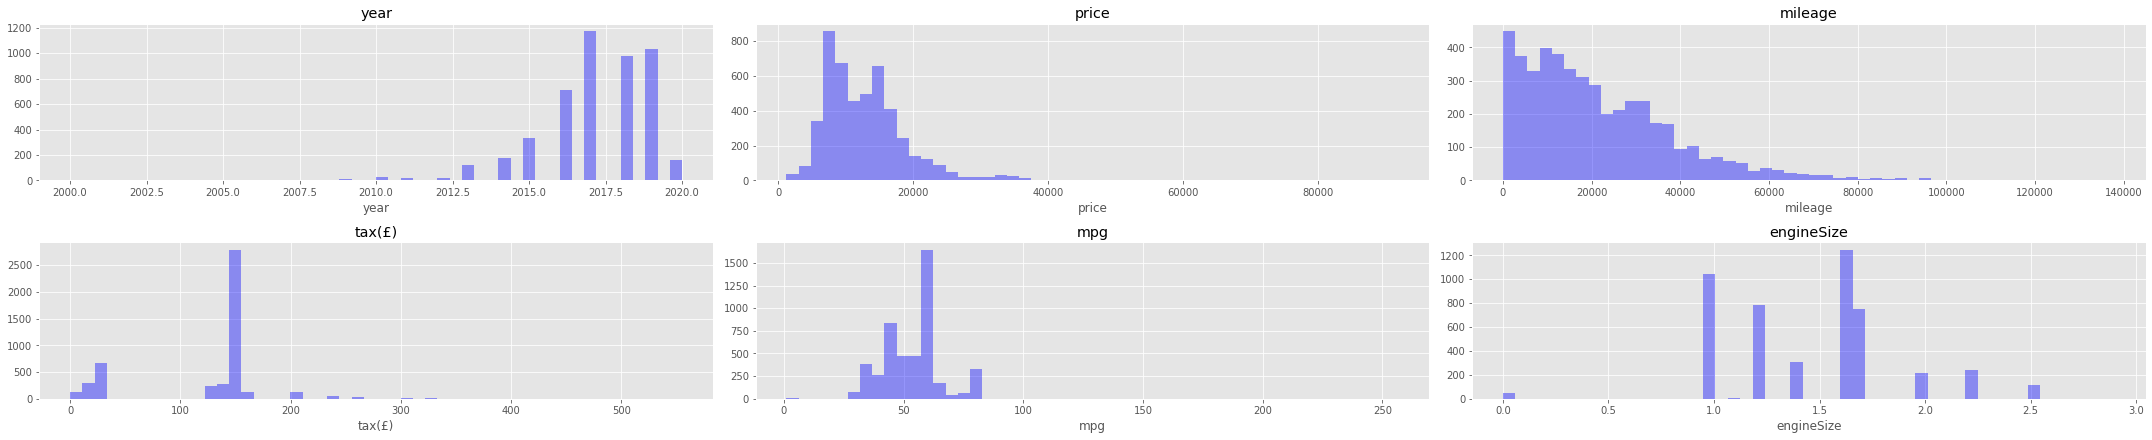

In [ ]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(df[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

In [ ]:
# Perform Bivariate analysis

In [ ]:
# 1 Plot pair plots

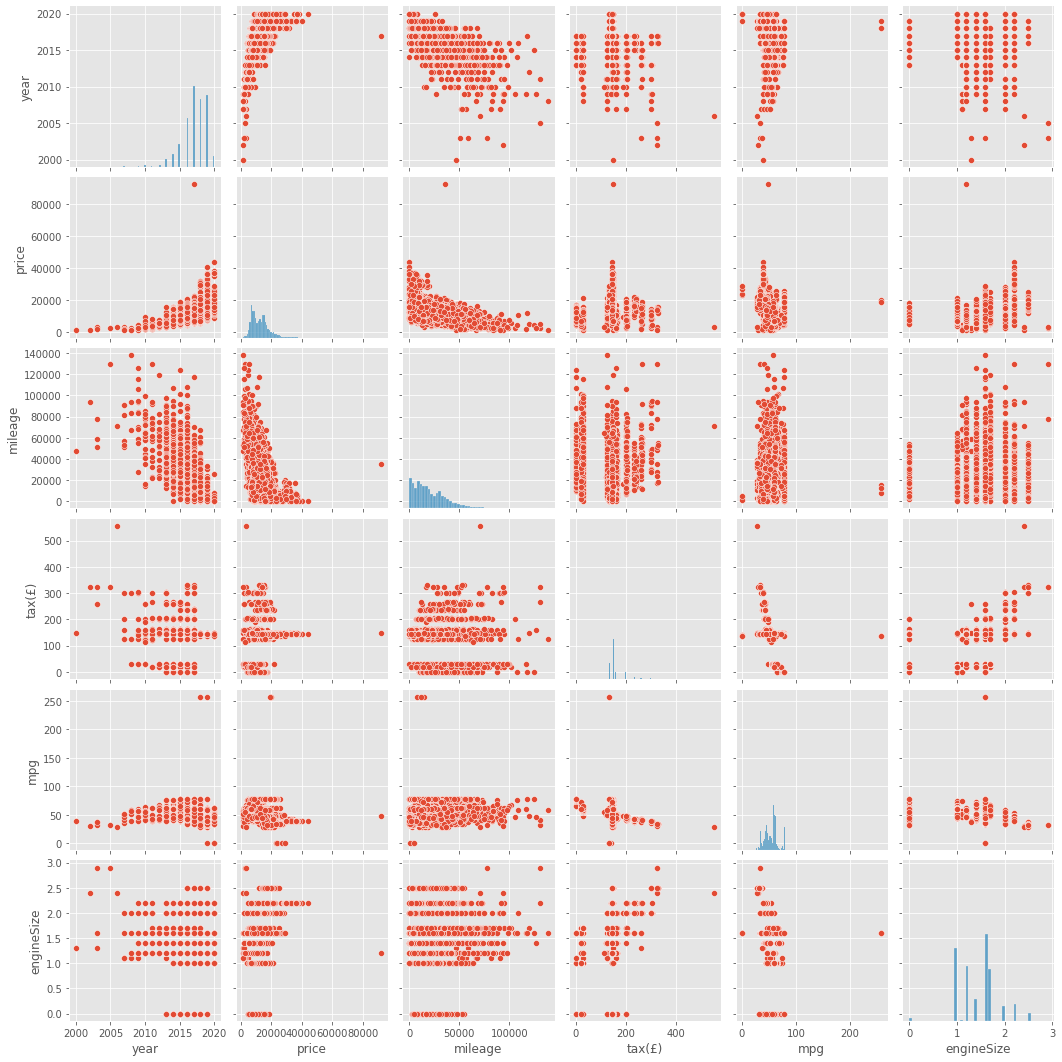

In [ ]:
sns.pairplot(df)

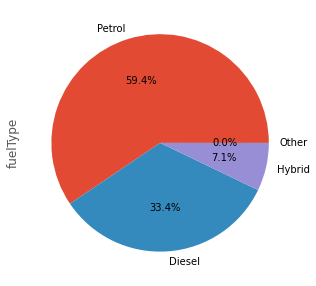

In [ ]:
plt.figure(1, figsize=(5,5))
df['fuelType'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

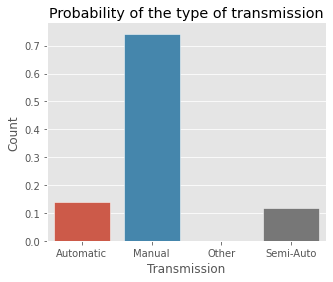

In [ ]:
temp=df.groupby("transmission")['model'].agg(len).reset_index()
fig=plt.figure(figsize=(5,4))
temp['frequency']=temp['model']/sum(temp['model'])
temp.drop('model',axis=1,inplace=True)
sns.barplot(data=temp,x='transmission',y='frequency',edgecolor='white')
plt.title("Probability of the type of transmission")
sns.despine()
plt.ylabel("Count")
plt.xlabel("Transmission")
plt.show()

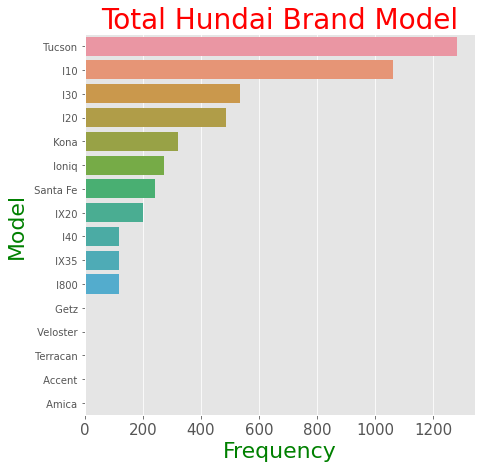

In [ ]:
plt.figure(figsize=(7,7))
most_cat = df['model'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df)
plt.xticks(size=15)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Model",size=22,c="g")
plt.title("Total Hundai Brand Model",size=28,c="r")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


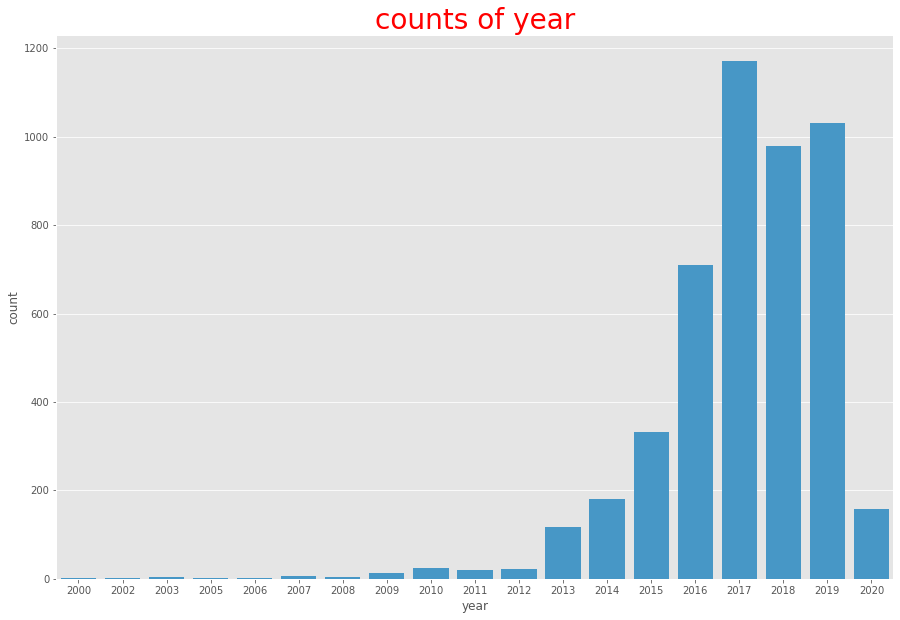

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("counts of year",size=28,c="r")
sns.countplot(df['year'], color='#329ddb')
plt.show()

Price Vs Year Vs Transmission



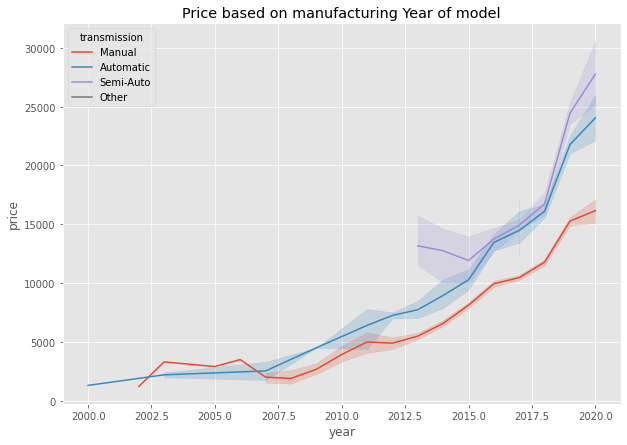

In [ ]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='year', y='price',hue='transmission',
             data=df)

Price Vs Year VS Fuel Type

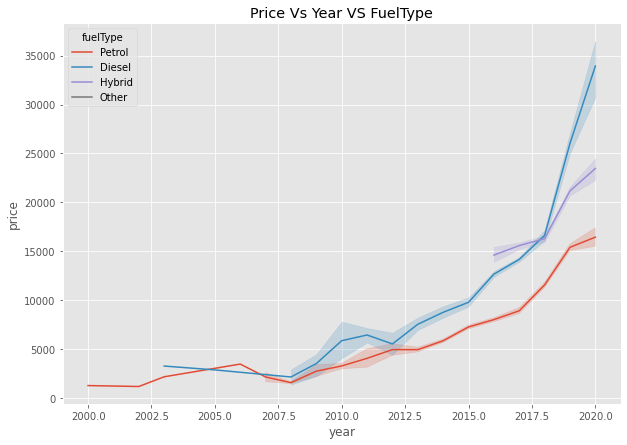

In [ ]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='year', y='price',hue='fuelType',
             data=df)

relationship between price and milage

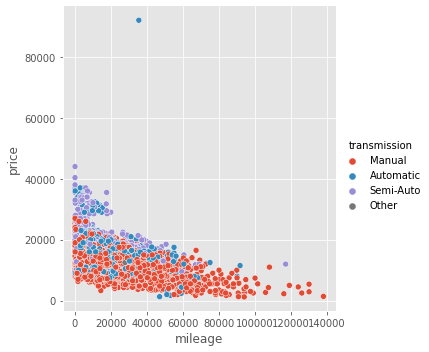

In [ ]:
sns.relplot(data=df, y='price',x='mileage',hue='transmission',aspect=1,height=5)

Text(0, 0.5, 'Count')

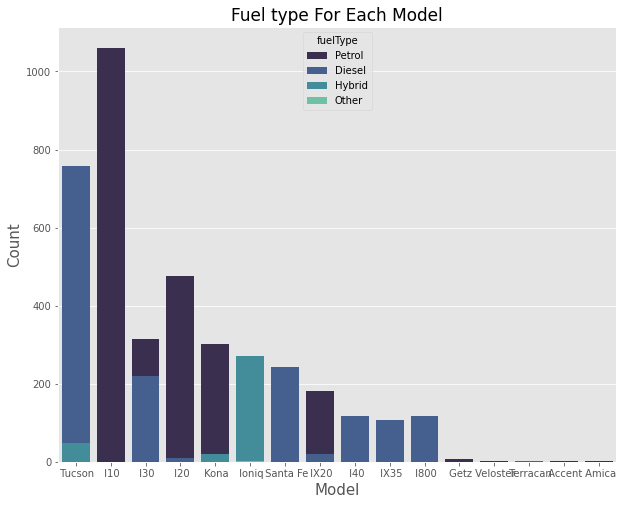

In [ ]:
plt.figure(figsize=(10,8))
count_of_model = df['model'].value_counts().sort_values(ascending=False)
sns.countplot(data=df, x='model',order=count_of_model.index,palette="mako",hue="fuelType",dodge=False)
plt.title('Fuel type For Each Model',size=17)
plt.xlabel('Model',size=15)
plt.ylabel('Count',size=15)

# CHI-SQUARE ANALYSIS


---



---



In [ ]:
# Perform a Chi-square analysis to check whether there is a relationship between
# transmission and fuelType
# fuelType and model


In [ ]:
import scipy.stats as stats

In [ ]:
dataset_table=pd.crosstab(df["transmission"],df["fuelType"])
print(dataset_table)

fuelType      Diesel  Hybrid  Other  Petrol
transmission                               
Automatic        218     277      1     162
Manual          1058      21      0    2467
Other              0       1      0       1
Semi-Auto        319      41      0     208


In [ ]:
dataset_table.values

array([[ 218,  277,    1,  162],
       [1058,   21,    0, 2467],
       [   0,    1,    0,    1],
       [ 319,   41,    0,  208]])

In [ ]:
# observed values
Observed_Values = dataset_table.values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 218  277    1  162]
 [1058   21    0 2467]
 [   0    1    0    1]
 [ 319   41    0  208]]


In [ ]:
val=stats.chi2_contingency(dataset_table)

In [ ]:
val

(1701.3676934890989,
 0.0,
 9,
 array([[2.19838710e+02, 4.68621701e+01, 1.37829912e-01, 3.91161290e+02],
        [1.18472350e+03, 2.52542941e+02, 7.42773356e-01, 2.10799078e+03],
        [6.68202765e-01, 1.42438207e-01, 4.18935903e-04, 1.18894009e+00],
        [1.89769585e+02, 4.04524508e+01, 1.18977796e-01, 3.37658986e+02]]))

In [ ]:
Expected_Values=val[3]

In [ ]:
no_of_rows=len(dataset_table.iloc[0:4,0])
no_of_columns=len(dataset_table.iloc[0:,0:4])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha=0.05

Degree of Freedom:- 9


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
chi_square

array([ 102.24260545, 1347.65526591,    6.25531915,  245.21450298])

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 1449.8978713619206


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 16.918977604620448


In [ ]:
# p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  9
p-value: 0.0


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [ ]:
dataset_table=pd.crosstab(df["fuelType"],df["model"])
print(dataset_table)

model      Accent   Amica   Getz   I10   I20   I30   I40   I800   IX20   IX35  \
fuelType                                                                        
Diesel          0       0      0     0    10   220   118    117     20    106   
Hybrid          0       0      0     0     0     0     0      0      0      0   
Other           0       0      0     0     0     0     0      0      0      0   
Petrol          1       1      6  1061   477   315     2      0    182     12   

model      Ioniq   Kona   Santa Fe   Terracan   Tucson   Veloster  
fuelType                                                           
Diesel         0      2        242          2      758          0  
Hybrid       272     19          0          0       49          0  
Other          1      0          0          0        0          0  
Petrol         2    301          2          0      473          3  


In [ ]:
# observed values
Observed_Values = dataset_table.values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[   0    0    0    0   10  220  118  117   20  106    0    2  242    2
   758    0]
 [   0    0    0    0    0    0    0    0    0    0  272   19    0    0
    49    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0    0    0
     0    0]
 [   1    1    6 1061  477  315    2    0  182   12    2  301    2    0
   473    3]]


In [ ]:
val=stats.chi2_contingency(dataset_table)

In [ ]:
Expected_Values=val[3]

In [ ]:
no_of_rows=len(dataset_table.iloc[0:4,0])
no_of_columns=len(dataset_table.iloc[0:,0:4])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha=0.05

Degree of Freedom:- 9


In [ ]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 1.3643410852713178


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 16.918977604620448


In [ ]:
# p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.9980336153848367
Significance level:  0.05
Degree of Freedom:  9
p-value: 0.9980336153848367


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# CORRELATION


---



---



In [ ]:
# 3 Calculate Pearson correlation, and plot their heatmap


In [ ]:
df.corr()

,year,price,mileage,tax(£),mpg,engineSize
year,1.000000,0.575325,-0.716930,0.265990,-0.179730,-0.034279
price,0.575325,1.000000,-0.443754,0.318448,-0.323742,0.521832
mileage,-0.716930,-0.443754,1.000000,-0.202304,0.179206,0.177276
tax(£),0.265990,0.318448,-0.202304,1.000000,-0.453649,0.224318
mpg,-0.179730,-0.323742,0.179206,-0.453649,1.000000,-0.215255
engineSize,-0.034279,0.521832,0.177276,0.224318,-0.215255,1.000000


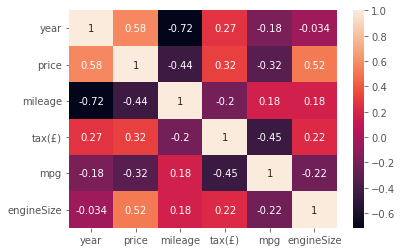

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Drop any unnecessary columns

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

1

In [ ]:
corr_features

{'mileage'}

In [ ]:
df.drop("year",axis=1,inplace=True)

# OUTLIER ANALYSIS


---



---



In [ ]:
col=['price','mileage','mpg','engineSize']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


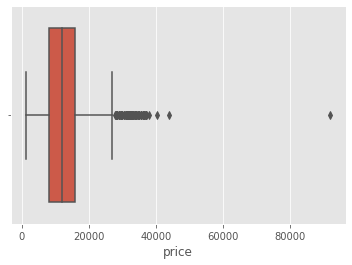

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


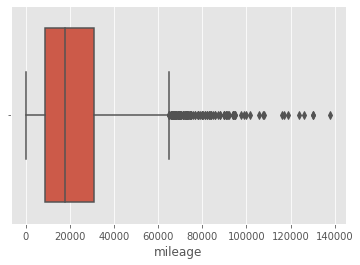

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


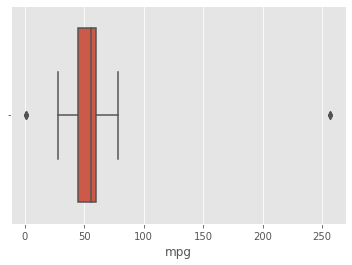

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


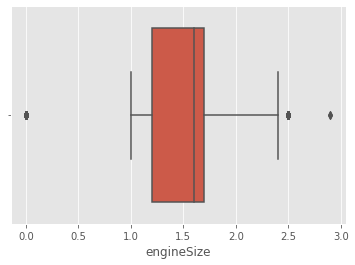

In [ ]:
for i in col:
    plt.show()
    sns.boxplot(df[i])

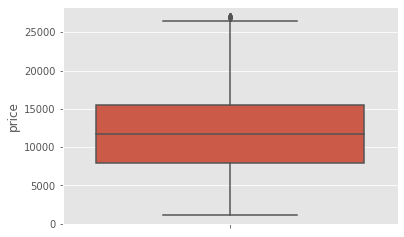

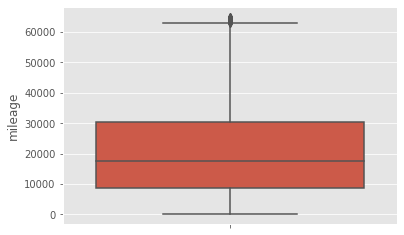

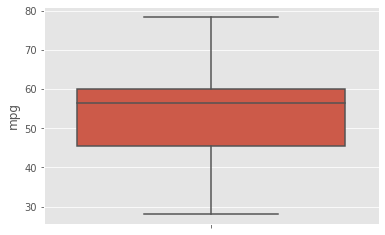

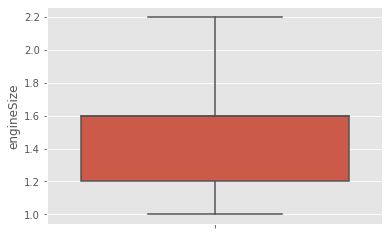

In [ ]:
col=['price','mileage','mpg','engineSize']
for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr =q3-q1
    upper = q3+iqr*(1.5)
    lower =q1-iqr*(1.5)
    df=df[(df[i] > lower) & (df[i]< upper)]
    plt.figure()
    sns.boxplot(y=i,data=df)


In [ ]:
df.shape

(4372, 8)

In [ ]:
df

,model,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...
4855,I30,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,13994,Manual,23313,Petrol,145,44.8,1.6


# BUILDING REGRESSION MODEL


---



---




#Linear Regression Price Prediction Model:
We are interested to build a linear regression model that helps us to predict the price of used Hyundai cars in the future.

Linear Regression is one of the algorithms of machine learning that helps in predicting numerical features but if we have a key feature as categorical we need to create what is called dummies variables for these features.

Also, we need to calculate the total price for our data to predict the total price too so we will create a new feature that sums the price of the car and its tax.

Let's start our job.

In [ ]:
# One hot encode categorical variables (if any)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
df['fuelType']=le.fit_transform(df['fuelType'])

In [ ]:
df=pd.get_dummies(df,drop_first = True)

In [ ]:
df.head()

,price,mileage,fuelType,tax(£),mpg,engineSize,model_ Amica,model_ Getz,model_ I10,model_ I20,...,model_ IX20,model_ IX35,model_ Ioniq,model_ Kona,model_ Santa Fe,model_ Tucson,model_ Veloster,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,7999,17307,3,145,58.9,1.2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,14499,25233,0,235,43.5,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11399,37877,0,30,61.7,1.7,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,6499,23789,3,20,60.1,1.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,10199,33177,0,160,51.4,2.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# 9 Split into train and test set

In [ ]:
X=df.drop("price",axis=1).values
Y=df["price"].values

In [ ]:
X

array([[1.7307e+04, 3.0000e+00, 1.4500e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.5233e+04, 0.0000e+00, 2.3500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.7877e+04, 0.0000e+00, 3.0000e+01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.3810e+04, 3.0000e+00, 2.0000e+01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.3313e+04, 3.0000e+00, 1.4500e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.1472e+04, 0.0000e+00, 1.2500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
Y

array([ 7999, 14499, 11399, ...,  6830, 13994, 15999])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=23)

In [ ]:
X_train


array([[1.1562e+04, 3.0000e+00, 1.5000e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.0000e+03, 3.0000e+00, 1.4500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.1856e+04, 1.0000e+00, 1.3500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.5000e+04, 0.0000e+00, 1.2500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.5860e+03, 3.0000e+00, 1.4500e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.7452e+04, 0.0000e+00, 1.2500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [ ]:
X_test


array([[2.8507e+04, 0.0000e+00, 1.5000e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.4473e+04, 0.0000e+00, 1.4500e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.4540e+03, 3.0000e+00, 1.4500e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.2981e+04, 0.0000e+00, 1.4500e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.9100e+02, 3.0000e+00, 1.4500e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.5000e+02, 3.0000e+00, 1.4500e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
Y_train


array([ 7291, 10991, 15998, ..., 15995,  8470, 13495])

In [ ]:
Y_test

array([18000, 15890,  7495, ..., 12498,  9800, 18500])

In [ ]:
# 10 Scale the variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)

In [ ]:
X_test=sc.transform(X_test)

In [ ]:
# Train multiple models like Linear regression, Decision Tree, Random Forest, SVR, etc.

**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [ ]:
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_preict=LR.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
mse=metrics.mean_squared_error(Y_test,Y_preict)

In [ ]:
mse

3753084.9552735775

In [ ]:
np.sqrt(mse)

1937.288041379902

In [ ]:
metrics.r2_score(Y_test,Y_preict)

0.8400749061348607

**DECISIONTREE**

In [ ]:
df11=df.copy()

In [ ]:
# making grroup of price between the price<= 13500 as (price<=13500) and price>13500 as (price>13500)
new=[]
for i in df11['price']:
    if i <= 13500:
        new.append('price<=13500')
    else:
        new.append("price>13500")

In [ ]:
# joining new column in data frame
df11['price_range']=new

In [ ]:
df11.head()

,price,mileage,fuelType,tax(£),mpg,engineSize,model_ Amica,model_ Getz,model_ I10,model_ I20,...,model_ IX35,model_ Ioniq,model_ Kona,model_ Santa Fe,model_ Tucson,model_ Veloster,transmission_Manual,transmission_Other,transmission_Semi-Auto,price_range
0,7999,17307,3,145,58.9,1.2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,price<=13500
1,14499,25233,0,235,43.5,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,price>13500
2,11399,37877,0,30,61.7,1.7,0,0,0,0,...,0,0,0,0,1,0,1,0,0,price<=13500
3,6499,23789,3,20,60.1,1.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,price<=13500
4,10199,33177,0,160,51.4,2.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,price<=13500


In [ ]:
df11['price_range']=le.fit_transform(df11['price_range'])

In [ ]:
df11.columns

Index(['price', 'mileage', 'fuelType', 'tax(£)', 'mpg', 'engineSize',
       'model_ Amica', 'model_ Getz', 'model_ I10', 'model_ I20', 'model_ I30',
       'model_ I40', 'model_ IX20', 'model_ IX35', 'model_ Ioniq',
       'model_ Kona', 'model_ Santa Fe', 'model_ Tucson', 'model_ Veloster',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'price_range'],
      dtype='object')

In [ ]:
X2=df11[['mileage', 'fuelType', 'tax(£)', 'mpg', 'engineSize',
       'model_ Amica', 'model_ Getz', 'model_ I10', 'model_ I20', 'model_ I30',
       'model_ I40', 'model_ IX20', 'model_ IX35', 'model_ Ioniq',
       'model_ Kona', 'model_ Santa Fe', 'model_ Tucson', 'model_ Veloster',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto']].values
Y2=df11["price_range"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train11,X_test11,Y_train11,Y_test11 = train_test_split(X2,Y2,test_size=0.3,random_state=23)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc1=DecisionTreeClassifier()

In [ ]:
dc1.fit(X_train11,Y_train11)

DecisionTreeClassifier()

In [ ]:
Y_pred_dc1=dc1.predict(X_test11)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test11,Y_pred_dc1)

0.9039634146341463

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test11,Y_pred_dc1)

array([[737,  57],
       [ 69, 449]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test11,Y_pred_dc1))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       794
           1       0.89      0.87      0.88       518

    accuracy                           0.90      1312
   macro avg       0.90      0.90      0.90      1312
weighted avg       0.90      0.90      0.90      1312



**RANDOMFOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train11,Y_train11)

RandomForestClassifier()

In [ ]:
Y_predict_rf=rf.predict(X_test11)

In [ ]:
accuracy_score(Y_test11,Y_predict_rf)

0.913109756097561

In [ ]:
confusion_matrix(Y_test11,Y_predict_rf)

array([[741,  53],
       [ 61, 457]])

In [ ]:
print(classification_report(Y_test11,Y_predict_rf))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       794
           1       0.90      0.88      0.89       518

    accuracy                           0.91      1312
   macro avg       0.91      0.91      0.91      1312
weighted avg       0.91      0.91      0.91      1312



In [ ]:
# random forest target=price

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
rf.fit(X_train, Y_train)
y_pred= rf.predict(X_test)

print("Accuracy on Traing set: ",rf.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf.score(X_test,Y_test))

Accuracy on Traing set:  0.9865115887490027
Accuracy on Testing set:  0.9209979592685671


**SVM (Support vector machines)**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train11,Y_train11)


# make predictions on test set
y_pred1=svc.predict(X_test11)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test11, y_pred1)))


Model accuracy score with default hyperparameters: 0.6578


In [ ]:
print(classification_report(Y_test11, y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75       794
           1       0.62      0.36      0.45       518

    accuracy                           0.66      1312
   macro avg       0.64      0.61      0.60      1312
weighted avg       0.65      0.66      0.63      1312



# 12 Check their performance, and comment on which is the best model

The best performance is given by randomforest with an accrucy score of 0.91



---



---


# GRID SEARCH CV


---



In [ ]:
# Use grid search CV to tune the hyperparameter of the best model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import svm

In [ ]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train11, Y_train11)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.618 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [ ]:

grid_predictions = grid.predict(X_test11)
  
# print classification report
print(classification_report(Y_test11, grid_predictions))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       794
           1       0.58      0.47      0.52       518

    accuracy                           0.66      1312
   macro avg       0.64      0.63      0.63      1312
weighted avg       0.65      0.66      0.65      1312



# POLYNOMIAL REGRESSION


---



---



In [ ]:
# Train a polynomial regression model with degrees 2, and 3 and compare its performance with other models 


In [ ]:
df11.columns

Index(['price', 'mileage', 'fuelType', 'tax(£)', 'mpg', 'engineSize',
       'model_ Amica', 'model_ Getz', 'model_ I10', 'model_ I20', 'model_ I30',
       'model_ I40', 'model_ IX20', 'model_ IX35', 'model_ Ioniq',
       'model_ Kona', 'model_ Santa Fe', 'model_ Tucson', 'model_ Veloster',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'price_range'],
      dtype='object')

In [ ]:
X = df11.loc[:,"mpg"].values
y = df11.loc[:,"price"].values

In [ ]:
y.shape

(4372,)

In [ ]:
X

array([58.9, 43.5, 61.7, ..., 60.1, 44.8, 57.6])

In [ ]:
y

array([ 7999, 14499, 11399, ...,  6830, 13994, 15999])

In [ ]:
X=X.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

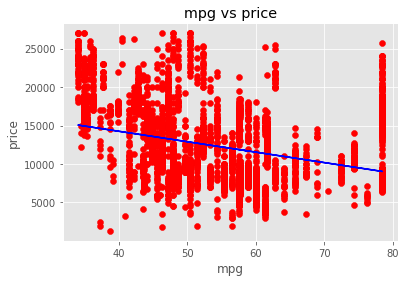

In [ ]:
plt.scatter(X,y, color='red')
plt.plot(X, lin_reg.predict(X),color='blue')
plt.title("mpg vs price")
plt.xlabel('mpg')
plt.ylabel('price')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
 
X     # prints X

array([[58.9],
       [43.5],
       [61.7],
       ...,
       [60.1],
       [44.8],
       [57.6]])

In [ ]:
X_poly     # prints the X_poly


array([[1.00000e+00, 5.89000e+01, 3.46921e+03],
       [1.00000e+00, 4.35000e+01, 1.89225e+03],
       [1.00000e+00, 6.17000e+01, 3.80689e+03],
       ...,
       [1.00000e+00, 6.01000e+01, 3.61201e+03],
       [1.00000e+00, 4.48000e+01, 2.00704e+03],
       [1.00000e+00, 5.76000e+01, 3.31776e+03]])

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

 **polynomial regression model with degrees 2**

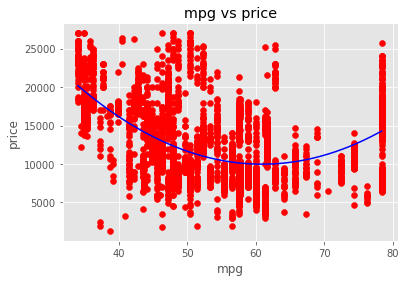

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
 
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
 
plt.title("mpg vs price")
plt.xlabel('mpg')
plt.ylabel('price')
plt.show()

 **polynomial regression model with degrees 3**

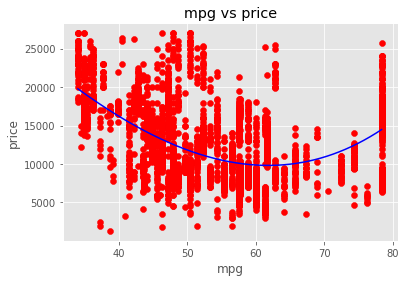

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
 
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
 
plt.title("mpg vs price")
plt.xlabel('mpg')
plt.ylabel('price')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features1 = PolynomialFeatures(degree=3)
x_poly = polynomial_features1.fit_transform(X)
model1 = LinearRegression()
model1.fit(X_poly, y)
y_poly_pred1 = model1.predict(X_poly)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse1 = np.sqrt(mean_squared_error(y,y_poly_pred1))
r21 = r2_score(y,y_poly_pred1)
print(rmse1)
print(r21)

4045.726157993895
0.31918777868362125
